In [49]:
import tensorflow as tf
from Model import create_dataset, compile_fit

train_ds, val_ds = create_dataset("Images_By_Label")
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.Dense(27)
])
model = compile_fit(model, train_ds, val_ds)



Found 2045 files belonging to 27 classes.
Using 1636 files for training.
Found 2045 files belonging to 27 classes.
Using 409 files for validation.
Epoch 1/12
52/52 [==============================] - 1s 6ms/step - loss: 1.2353 - accuracy: 0.6644 - val_loss: 0.6219 - val_accuracy: 0.8191
Epoch 2/12
52/52 [==============================] - 0s 5ms/step - loss: 0.4021 - accuracy: 0.8771 - val_loss: 0.3066 - val_accuracy: 0.9022
Epoch 3

In [50]:
import numpy as np
#https://stackoverflow.com/questions/64687375/get-labels-from-dataset-when-using-tensorflow-image-dataset-from-directory
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, y])
print(predictions)
print(labels)

[20. 26. 11.  0.  4.  7. 20. 19.  0.  0.  1.  2.  6.  0.  4.  0.  7.  2.
 22.  4. 22.  8. 21. 21. 21. 21. 19.  4. 22.  0.  5. 19.  5. 11. 22. 16.
 16. 21. 18.  0. 22.  5. 17. 12. 26.  1. 10. 26. 26. 10. 26.  4. 18.  4.
 23.  5. 26.  8. 21. 10.  1. 16.  5. 26. 21.  0.  7. 22. 23. 21. 10. 20.
  0. 26.  2. 18. 22. 26.  8.  2. 21. 22. 18. 18. 26. 26. 21.  6. 26. 21.
 21. 19.  1. 19. 19.  4. 21. 16.  5. 26. 19. 19.  4.  1. 19. 10.  2.  2.
 17. 20.  5.  4. 21.  0.  5.  6. 26. 21.  4. 25. 26. 10. 14. 26.  2.  2.
 21. 17. 21.  4. 19.  5. 18. 21.  0.  0.  5.  4.  5.  5.  1. 18. 22. 22.
  5. 21.  4.  6.  5. 21.  4.  1.  1.  4. 26.  6.  4. 21.  8. 21.  4.  0.
 19. 26. 10. 19. 22. 17. 22.  8. 16. 24.  2. 26.  4. 19. 18. 21. 17. 11.
  5. 26. 21.  0. 10.  0.  4.  0. 17. 19. 17.  4. 12. 21. 21.  5.  7. 22.
 24. 10. 17.  3. 20.  9. 10. 18.  0. 26.  0. 26.  4. 18.  4.  2. 22. 17.
 17.  1.  4. 17. 26.  7.  4.  0.  0. 20.  4. 26.  4. 20. 24. 21. 10. 10.
 18.  1. 17. 14. 18. 22.  7.  0.  6. 14. 18.  5.  5

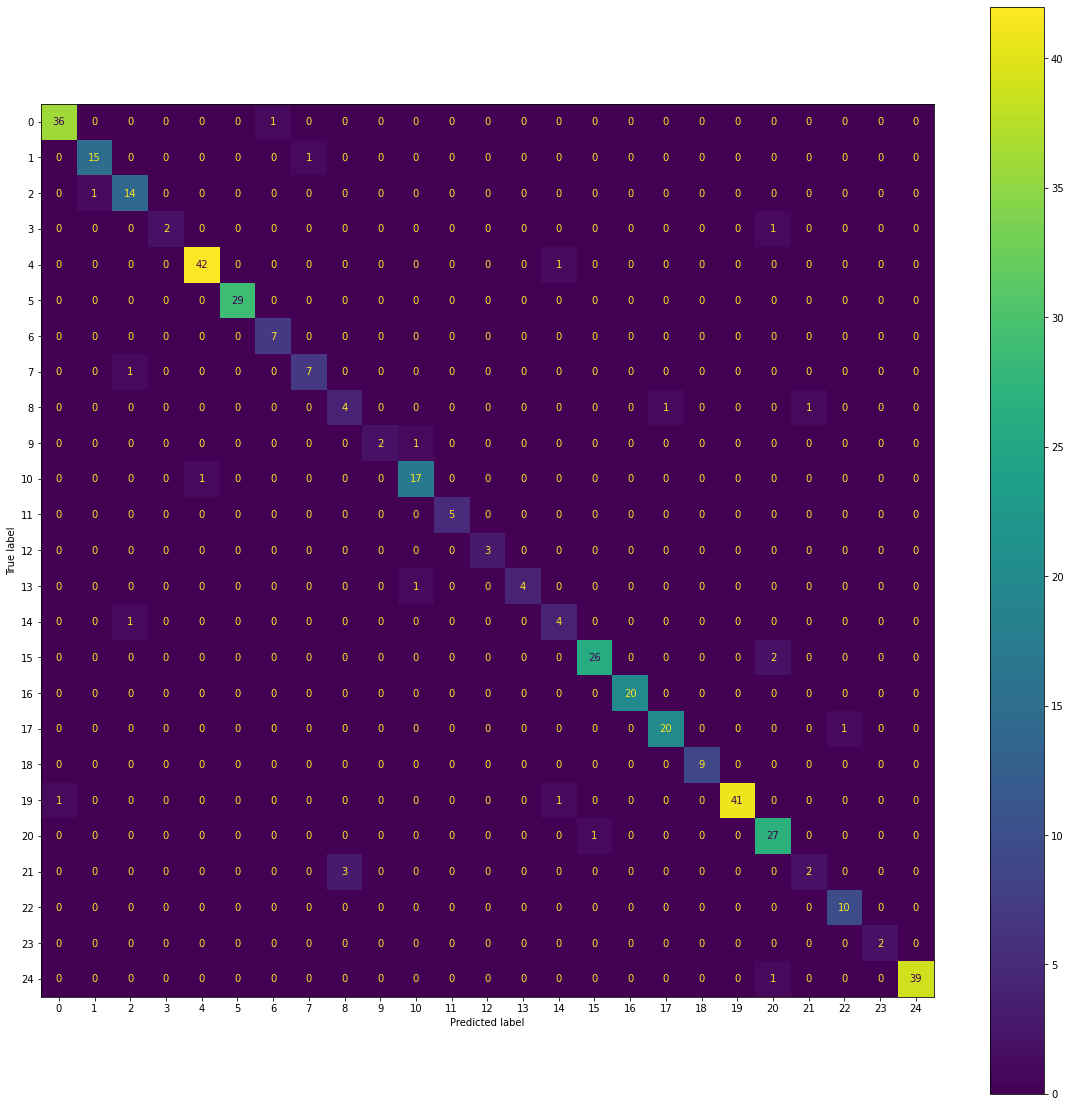

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(labels, predictions)).plot(ax=ax)